In [1]:
import numpy as np
import pandas as pd
from io import StringIO

## Simple Example

In [2]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['temp']], df.today

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [5]:
tree.score(X,y)

0.8

In [10]:
print(export_text(tree, feature_names=X.columns.tolist(), show_weights=True))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- weights: [1.00, 2.00] class: rain
|   |--- temp >  80.50
|   |   |--- weights: [0.00, 3.00] class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- weights: [1.00, 0.00] class: no rain
|   |--- temp >  87.50
|   |   |--- weights: [1.00, 2.00] class: rain



[Text(167.4, 181.2, 'temp <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = rain'),
 Text(83.7, 108.72, 'temp <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = rain'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = rain'),
 Text(251.10000000000002, 108.72, 'temp <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no rain'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no rain'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain')]

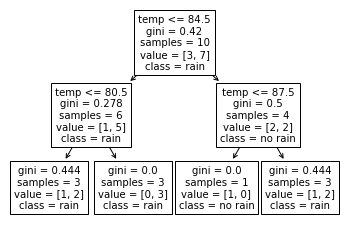

In [13]:
plot_tree(tree, feature_names=X.columns.tolist(), class_names=sorted(y.unique()))

## Titanic Example

In [14]:
import acquire
import prepare

train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

/Users/guadalupeluna/code-up-data-science/classification-exercises/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [15]:
X_cols = ['pclass', 'alone', 'Q', 'S']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [17]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 71.43%
validate score: 71.03%


[Text(798.3692307692309, 597.96, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(463.5692307692308, 489.24, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(257.53846153846155, 380.52000000000004, 'pclass <= 1.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(154.52307692307693, 271.8, 'Q <= 0.5\ngini = 0.383\nsamples = 62\nvalue = [16, 46]\nclass = survived'),
 Text(103.01538461538462, 163.07999999999998, 'S <= 0.5\ngini = 0.375\nsamples = 60\nvalue = [15, 45]\nclass = survived'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = survived'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.368\nsamples = 37\nvalue = [9, 28]\nclass = survived'),
 Text(206.03076923076924, 163.07999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = died'),
 Text(360.55384615384617, 271.8, 'S <= 0.5\ngini = 0.457\nsamples = 48\nvalue = [

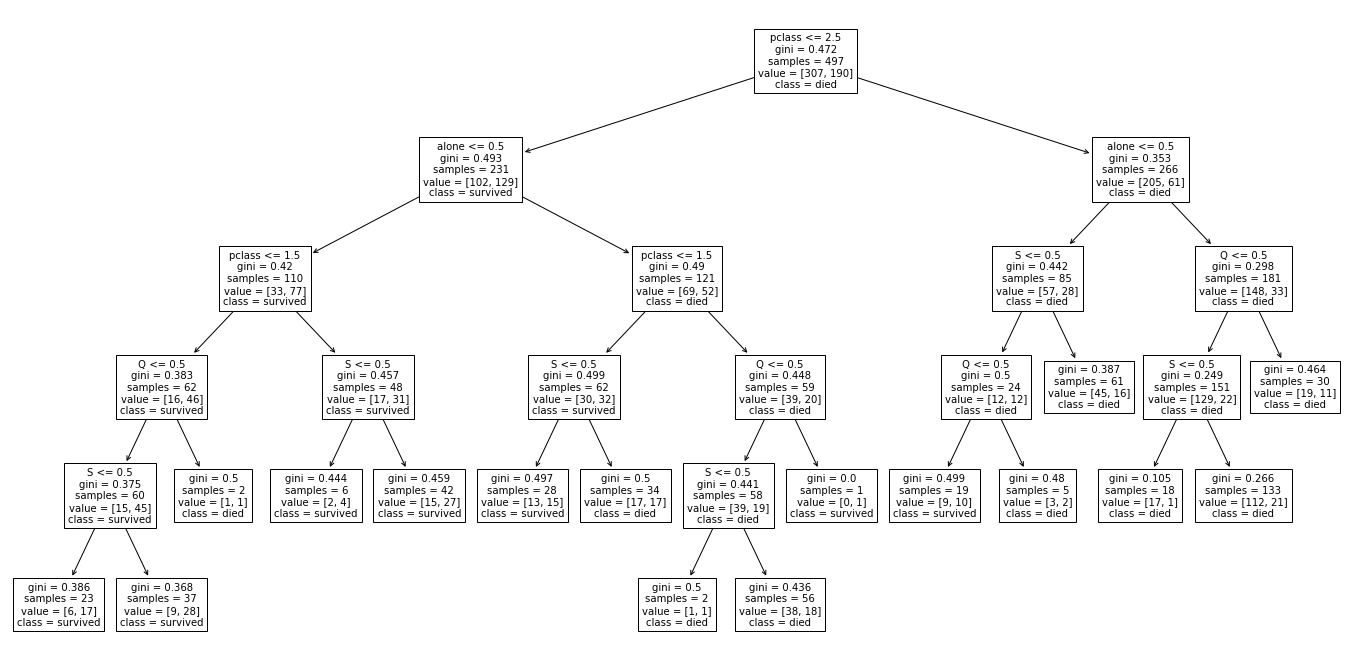

In [23]:
import matplotlib.pyplot as plt

# TODO: interpret + visualize model

plt.figure(figsize=(24,12))
plot_tree(model1, 
          feature_names=X_train.columns.tolist(),
          class_names=['died', 'survived'])

[Text(377.7230769230769, 428.08500000000004, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(137.35384615384615, 305.775, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(68.67692307692307, 183.46500000000003, 'gini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(206.03076923076924, 183.46500000000003, 'pclass <= 1.5\ngini = 0.49\nsamples = 121\nvalue = [69, 52]\nclass = died'),
 Text(137.35384615384615, 61.15499999999997, 'gini = 0.499\nsamples = 62\nvalue = [30, 32]\nclass = survived'),
 Text(274.7076923076923, 61.15499999999997, 'gini = 0.448\nsamples = 59\nvalue = [39, 20]\nclass = died'),
 Text(618.0923076923077, 305.775, 'alone <= 0.5\ngini = 0.353\nsamples = 266\nvalue = [205, 61]\nclass = died'),
 Text(480.73846153846154, 183.46500000000003, 'S <= 0.5\ngini = 0.442\nsamples = 85\nvalue = [57, 28]\nclass = died'),
 Text(412.0615384615385, 61.15499999999997, 'gini = 0.5\nsamples = 2

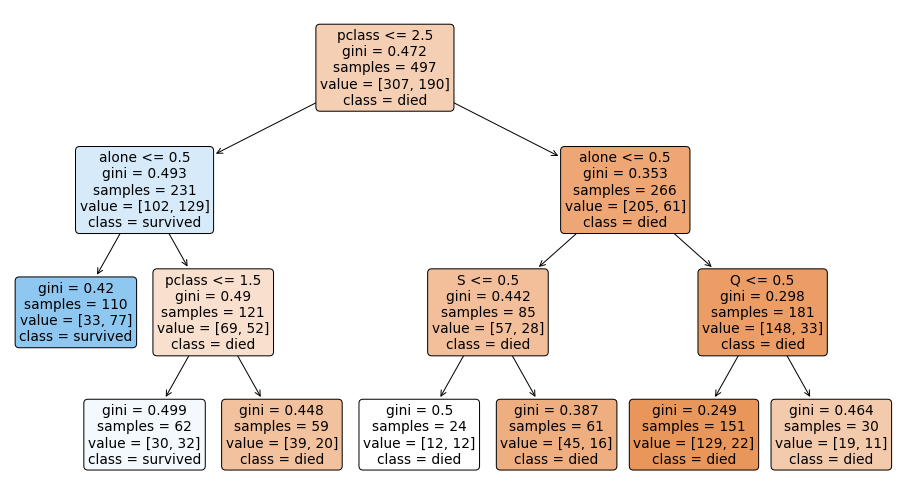

In [31]:
# TODO: create additional models

model2 = DecisionTreeClassifier(max_leaf_nodes=7)
model2.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'], filled=True, rounded=True)

In [33]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass    0.651982
alone     0.248213
Q         0.055560
S         0.044245
dtype: float64

<AxesSubplot:ylabel='Feature Importance'>

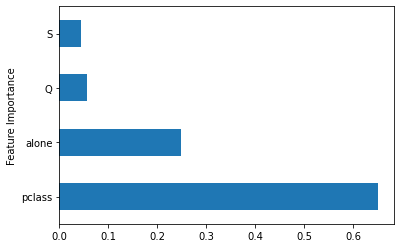

In [36]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.barh(xlabel='Feature Importance')

In [27]:
# With the output from the cell above, the index is the feature name, and the alues are the importances of each feature, according to our decision tree model.

## Recap

Decicision Trees in the modeling loop

1.  Create the model (setting hyperparams)
2.  Fit the object on training data (sklearn does math)
3.  Interpret / use the model (evaluate it's performance and see how it works)